In [1]:
import math
import pickle
import sklearn
import numpy as np
%load_ext cudf.pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [3]:
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/wind project/final data ERA5 24 hours.xlsx")

In [4]:
data


,# date,lat,lon,soil_temp,temp,solar_rd,u10,v10,soil_temp.1,temp.1,...,wind speed.3,Unnamed: 43,Unnamed: 44,solar_rd.4,u10.4,v10.4,soil_temp.5,temp.5,pressure.4,wind speed.4
0,2011-01-01,14.5,77.5,293.431,292.019,1.961410e+07,0.155315,1.399950,20.281,18.869,...,2.566997,NaN,NaN,1.961410e+07,0.155315,1.399950,20.281,18.869,95848.4,1.502179
1,2011-01-01,14.5,77.5,293.063,291.975,1.862650e-09,0.114499,1.303050,19.913,18.825,...,3.115833,NaN,NaN,1.862650e-09,0.114499,1.303050,19.913,18.825,95901.0,1.064268
2,2011-01-01,14.5,77.5,293.102,292.538,1.086020e+05,-0.272937,1.208260,19.952,19.388,...,3.408713,NaN,NaN,1.086020e+05,-0.272937,1.208260,19.952,19.388,95997.9,0.747660
3,2011-01-01,14.5,77.5,295.555,295.004,8.415560e+05,-0.401350,1.049350,22.405,21.854,...,3.495023,NaN,NaN,8.415560e+05,-0.401350,1.049350,22.405,21.854,96101.7,0.779042
4,2011-01-01,14.5,77.5,299.023,297.310,2.294920e+06,-0.516890,0.721392,25.873,24.160,...,3.752448,NaN,NaN,2.294920e+06,-0.516890,0.721392,25.873,24.160,96141.0,1.262038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95684,2021-11-30,14.5,77.5,295.158,294.168,1.327630e+07,-2.551080,NaN,22.008,21.018,...,NaN,NaN,NaN,1.327630e+07,-2.551080,NaN,22.008,21.018,NaN,NaN
95685,2021-11-30,14.5,77.5,295.109,294.074,1.327630e+07,-2.560500,NaN,21.959,20.924,...,NaN,NaN,NaN,1.327630e+07,-2.560500,NaN,21.959,20.924,NaN,NaN
95686,2021-11-30,14.5,77.5,295.131,294.094,1.327630e+07,-2.294890,NaN,21.981,20.944,...,NaN,NaN,NaN,1.327630e+07,-2.294890,NaN,21.981,20.944,NaN,NaN
95687,2021-11-30,14.5,77.5,295.089,294.012,1.327630e+07,-2.214200,NaN,21.939,20.862,...,NaN,NaN,NaN,1.327630e+07,-2.214200,NaN,21.939,20.862,NaN,NaN


In [5]:
df=data[["temp.1",'soil_temp.1','solar_rd','pressure','u10','v10','wind speed']]

In [6]:
df=df[:90000]

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [13]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [14]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
x_train_scaled.shape

(63000, 6)

In [16]:
model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,569 (334.25 KB)

 Trainable params: 84,289 (329.25 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [20]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - val_loss: 0.0476 - val_mean_absolute_error: 0.0476
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - val_loss: 0.0526 - val_mean_absolute_error: 0.0526
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - val_loss: 0.0494 - val_mean_absolute_error: 0.0494
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - val_lo

In [21]:
predictions1h=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [22]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1657 - mean_absolute_error: 0.1657
mean squared error 0.15679612755775452
mean absolute error 0.15679612755775452


0.3959749077375415

In [24]:
pred1h=pd.DataFrame(predictions1h)
pred1h.to_csv("ann predictions 1h.csv")
y_test.to_csv('ann y_test 1h.csv')


In [25]:
df3h=data[["temp.2",'soil_temp.2','solar_rd.1','pressure.1','u10.1','v10.1',"wind speed.1"]]

In [26]:
df3h

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.123484
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,0.887458
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.636728
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.922119
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.553067
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,2.214200
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,2.057840
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [27]:
df3h=df3h[:90000]

In [28]:
df3h.describe()

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
count,90000.000000,90000.000000,9.000000e+04,90000.000000,90000.000000,90000.000000,90000.000000
mean,26.931202,29.515442,1.444083e+07,95947.575214,0.739724,0.222411,3.202760
std,4.775821,6.720845,8.239108e+06,327.585181,3.256255,1.226050,1.563794
min,12.844000,15.024000,0.000000e+00,94864.100000,-7.145060,-6.181590,0.011003
25%,23.611000,24.697000,7.611002e+06,95699.500000,-2.160270,-0.624168,2.050907
50%,26.443000,28.004000,1.626740e+07,95935.200000,0.334119,0.336138,3.038441
75%,29.953000,32.925000,2.121330e+07,96194.500000,3.672690,1.103350,4.167724
max,41.062000,53.178000,2.793320e+07,97050.100000,10.352300,6.817320,10.352305


In [29]:
df3h.isnull().sum()

,0
temp.2,0
soil_temp.2,0
solar_rd.1,0
pressure.1,0
u10.1,0
v10.1,0
wind speed.1,0


In [30]:
x=df3h.iloc[:,:-1]
y=df3h.iloc[:,-1:]

In [31]:
x['hourdata']=data['wind speed']

In [32]:
x

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,hourdata
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.408539
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.308071
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.238704
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.123484
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,0.887458
...,...,...,...,...,...,...,...
89995,28.539,30.224,2.664550e+07,96100.9,-1.218290,1.445450,1.890385
89996,27.429,29.224,2.664550e+07,96033.7,-0.356766,1.823630,1.858200
89997,26.702,28.486,2.664550e+07,95951.3,0.283099,1.986080,2.006155
89998,25.731,27.599,2.664550e+07,95884.4,1.402390,2.070490,2.500725


In [33]:
y

,wind speed.1
0,1.123484
1,0.887458
2,0.636728
3,0.922119
4,1.553067
...,...
89995,2.500725
89996,2.794666
89997,2.847885
89998,2.462561


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [35]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [36]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [37]:
x_train_scaled.shape

(63000, 7)

In [38]:
model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,633 (334.50 KB)

 Trainable params: 84,353 (329.50 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [42]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.6154 - mean_absolute_error: 0.6154 - val_loss: 0.5680 - val_mean_absolute_error: 0.5680
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - val_loss: 0.5660 - val_mean_absolute_error: 0.5660
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - val_loss: 0.5638 - val_mean_absolute_error: 0.5638
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6099 - mean_absolute_error: 0.6099 - val_loss: 0.5622 - val_mean_absolute_error: 0.5622
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - val_loss: 0.5642 - val_mean_absolute_error: 0.5642
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6079 - mean_absolute_error: 0.6079 - val_loss: 0.5635 - val_mean_absolute_error: 0.5635
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6064 - mean_absolute_error: 0.6064 - val_lo

In [43]:
predictions3h=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [44]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5749 - mean_absolute_error: 0.5749
mean squared error 0.5561331510543823
mean absolute error 0.5561331510543823


In [45]:
rmse=math.sqrt(mse)
rmse

0.7457433546833537

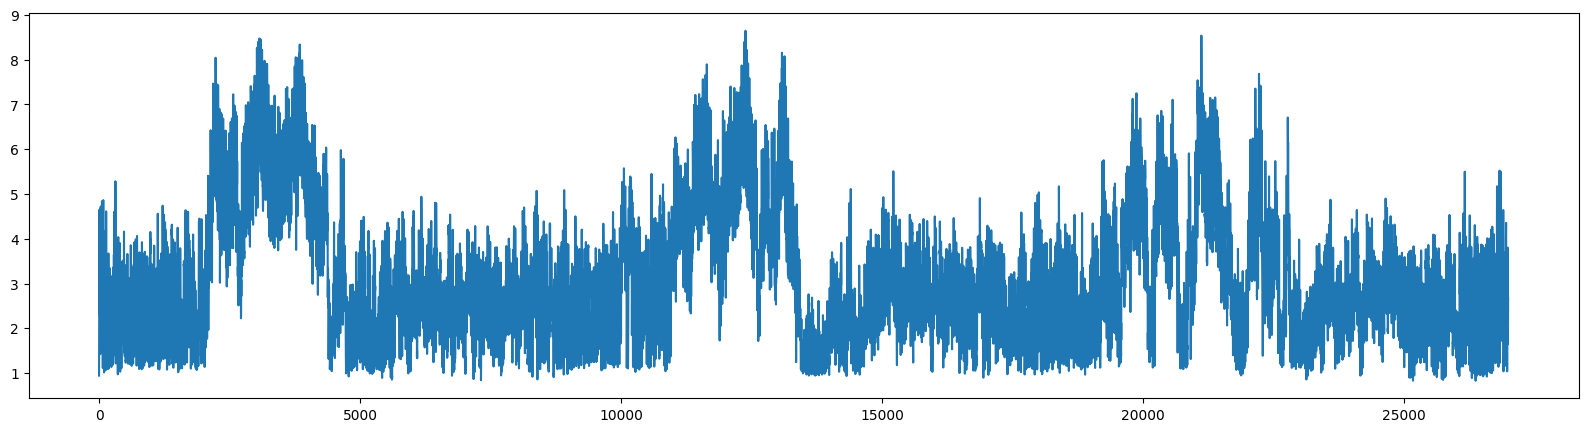

In [46]:
plt.figure(figsize=(20,5))
plt.plot(predictions3h)


In [47]:
pred3h=pd.DataFrame(predictions3h)
pred3h.to_csv("ann predictions 3h.csv")
y_test.to_csv('ann y_test 3h.csv')


In [48]:

with open('aan3h.pickle','wb') as f3:
  pickle.dump(model,f3)

In [49]:

with open('aan3h.pickle','rb') as f3:
  fm3=pickle.load(f3)

In [50]:
predictions3=fm3.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [51]:
mse=mean_squared_error(y_test,predictions3)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions3)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions3)
print("r2 coeffient :",r2)

MSE: 0.5436087949092604
MAE: 0.5561332541388013
RMSE : 0.7372983079522565
r2 coeffient : 0.7738865482087894


wind speed for next 6 hours

In [52]:
df6h=data[["temp.3",'soil_temp.3','solar_rd.2','pressure.2','u10.2','v10.2',"wind speed.2"]]

In [53]:
df6h

,temp.3,soil_temp.3,solar_rd.2,pressure.2,u10.2,v10.2,wind speed.2
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,0.922119
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.553067
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.851348
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.940464
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.946160
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [54]:
df6h=df6h[:90000]

In [55]:
x=df6h.iloc[:,:-1]
y=df6h.iloc[:,-1:]

In [56]:
x['onehour']=data['wind speed']
x['threehour']=data['wind speed.1']

In [57]:
x

,temp.3,soil_temp.3,solar_rd.2,pressure.2,u10.2,v10.2,onehour,threehour
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.408539,1.123484
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.308071,0.887458
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.238704,0.636728
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.123484,0.922119
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,0.887458,1.553067
...,...,...,...,...,...,...,...,...
89995,28.539,30.224,2.664550e+07,96100.9,-1.218290,1.445450,1.890385,2.500725
89996,27.429,29.224,2.664550e+07,96033.7,-0.356766,1.823630,1.858200,2.794666
89997,26.702,28.486,2.664550e+07,95951.3,0.283099,1.986080,2.006155,2.847885
89998,25.731,27.599,2.664550e+07,95884.4,1.402390,2.070490,2.500725,2.462561


In [58]:
y

,wind speed.2
0,0.922119
1,1.553067
2,1.851348
3,1.940464
4,1.946160
...,...
89995,2.462561
89996,2.659295
89997,2.975282
89998,2.540549


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [60]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [61]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [62]:
x_train_scaled.shape

(63000, 8)

In [63]:
model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,697 (334.75 KB)

 Trainable params: 84,417 (329.75 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [66]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 3.0354 - mean_absolute_error: 3.0354 - val_loss: 1.3128 - val_mean_absolute_error: 1.3128
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5129 - mean_absolute_error: 1.5129 - val_loss: 0.7233 - val_mean_absolute_error: 0.7233
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9940 - mean_absolute_error: 0.9940 - val_loss: 0.6441 - val_mean_absolute_error: 0.6441
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8785 - mean_absolute_error: 0.8785 - val_loss: 0.6248 - val_mean_absolute_error: 0.6248
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8222 - mean_absolute_error: 0.8222 - val_loss: 0.6135 - val_mean_absolute_error: 0.6135
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7873 - mean_absolute_error: 0.7873 - val_loss: 0.6087 - val_mean_absolute_error: 0.6087
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7553 - mean_absolute_error: 0.7553 - val_lo

In [67]:
predictions6h=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [68]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6229 - mean_absolute_error: 0.6229
mean squared error 0.596750020980835
mean absolute error 0.596750020980835


In [69]:
rmse=math.sqrt(mse)
rmse

0.7724959682618641

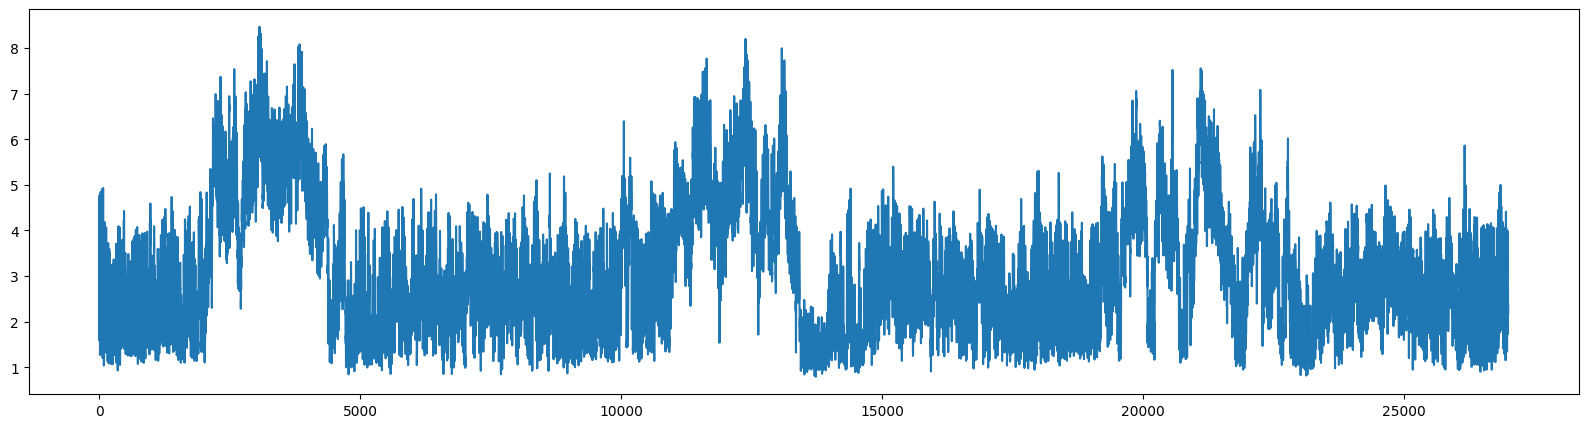

In [70]:
plt.figure(figsize=(20,5))
plt.plot(predictions6h)

In [71]:
pred6h=pd.DataFrame(predictions6h)
pred6h.to_csv("ann predictions 6h.csv")
y_test.to_csv('ann y_test 6h.csv')


In [72]:
with open('aan6h.pickle','wb') as f6:
  pickle.dump(model,f6)

In [73]:
with open('aan6h.pickle','rb') as f6:
  fm6=pickle.load(f6)

In [74]:
predictions6=fm6.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [75]:
mse=mean_squared_error(y_test,predictions6)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions6)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions6)
print("r2 coeffient :",r2)

MSE: 0.6323321179695516
MAE: 0.5967501629458007
RMSE : 0.7951931324964719
r2 coeffient : 0.7369585274027757


12 hours wind prediction

In [76]:
df12h=data[["temp.4",'soil_temp.4','solar_rd.3','pressure.3','u10.3','v10.3',"wind speed.3"]]
df12h

,temp.4,soil_temp.4,solar_rd.3,pressure.3,u10.3,v10.3,wind speed.3
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,2.566997
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,3.115833
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,3.408713
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,3.495023
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,3.752448
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [77]:
df12h=df12h[:90000]
x=df12h.iloc[:,:-1]
y=df12h.iloc[:,-1:]

In [78]:
x['onehour']=data['wind speed']
x['threehour']=data['wind speed.1']
x['sixhour']=data['wind speed.2']

In [79]:
x

,temp.4,soil_temp.4,solar_rd.3,pressure.3,u10.3,v10.3,onehour,threehour,sixhour
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.408539,1.123484,0.922119
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.308071,0.887458,1.553067
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.238704,0.636728,1.851348
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.123484,0.922119,1.940464
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,0.887458,1.553067,1.946160
...,...,...,...,...,...,...,...,...,...
89995,28.539,30.224,2.664550e+07,96100.9,-1.218290,1.445450,1.890385,2.500725,2.462561
89996,27.429,29.224,2.664550e+07,96033.7,-0.356766,1.823630,1.858200,2.794666,2.659295
89997,26.702,28.486,2.664550e+07,95951.3,0.283099,1.986080,2.006155,2.847885,2.975282
89998,25.731,27.599,2.664550e+07,95884.4,1.402390,2.070490,2.500725,2.462561,2.540549


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [81]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [82]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [83]:
model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [85]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 3.0372 - mean_absolute_error: 3.0372 - val_loss: 1.4482 - val_mean_absolute_error: 1.4482
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5641 - mean_absolute_error: 1.5641 - val_loss: 0.7776 - val_mean_absolute_error: 0.7776
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0690 - mean_absolute_error: 1.0690 - val_loss: 0.7647 - val_mean_absolute_error: 0.7647
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9742 - mean_absolute_error: 0.9742 - val_loss: 0.7329 - val_mean_absolute_error: 0.7329
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9153 - mean_absolute_error: 0.9153 - val_loss: 0.7211 - val_mean_absolute_error: 0.7211
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8750 - mean_absolute_error: 0.8750 - val_loss: 0.7250 - val_mean_absolute_error: 0.7250
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8477 - mean_absolute_error: 0.8477 - val_lo

In [86]:
predictions12h=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [87]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7221 - mean_absolute_error: 0.7221
mean squared error 0.6980105042457581
mean absolute error 0.6980105042457581


0.8354702294191925

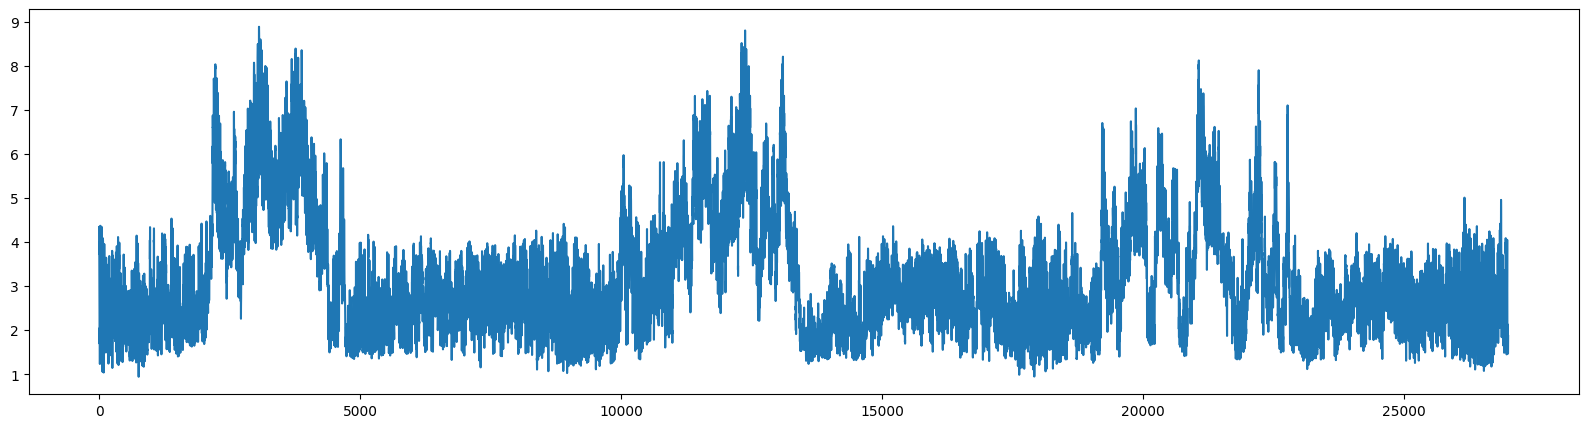

In [88]:
plt.figure(figsize=(20,5))
plt.plot(predictions12h)


In [89]:
pred12h=pd.DataFrame(predictions12h)
pred12h.to_csv('ann prediction 12h.csv')
y_test.to_csv('ann test_values 12h.csv')

In [90]:
with open('ann12h.pickle','wb') as f12:
  pickle.dump(model,f12)

In [91]:
with open('ann12h.pickle','rb') as f12:
  fm12=pickle.load(f12)

In [92]:
mse,mae=fm12.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7221 - mean_absolute_error: 0.7221
mean squared error 0.6980105042457581
mean absolute error 0.6980105042457581


0.8354702294191925

In [93]:
predictions12=fm12.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [94]:
mse=mean_squared_error(y_test,predictions12)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions12)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions12)
print("r2 coeffient :",r2)

MSE: 0.8140148862149619
MAE: 0.6980103733546592
RMSE : 0.902227735228175
r2 coeffient : 0.6614197520678382


In [95]:
df24h=data[["temp.5",'soil_temp.5','solar_rd.4','pressure.4','u10.4','v10.4',"wind speed.4"]]
df24h


,temp.5,soil_temp.5,solar_rd.4,pressure.4,u10.4,v10.4,wind speed.4
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.502179
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.064268
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.747660
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.779042
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.262038
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [96]:
df24h=df24h[:90000]
x=df24h.iloc[:,:-1]
y=df24h.iloc[:,-1:]

In [97]:
x['onehour']=data['wind speed']
x['threehour']=data['wind speed.1']
x['sixhour']=data['wind speed.2']
x['twelehour']=data['wind speed.3']


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)


In [99]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [100]:

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [101]:
model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [103]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 3.0629 - mean_absolute_error: 3.0629 - val_loss: 1.3506 - val_mean_absolute_error: 1.3506
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5543 - mean_absolute_error: 1.5543 - val_loss: 0.7025 - val_mean_absolute_error: 0.7025
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0056 - mean_absolute_error: 1.0056 - val_loss: 0.6639 - val_mean_absolute_error: 0.6639
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8852 - mean_absolute_error: 0.8852 - val_loss: 0.6487 - val_mean_absolute_error: 0.6487
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8319 - mean_absolute_error: 0.8319 - val_loss: 0.6356 - val_mean_absolute_error: 0.6356
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7997 - mean_absolute_error: 0.7997 - val_loss: 0.6325 - val_mean_absolute_error: 0.6325
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - val_lo

In [104]:
predictions=model.predict(x_test_scaled)


844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [105]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)


844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6642 - mean_absolute_error: 0.6642
mean squared error 0.6475324630737305
mean absolute error 0.6475324630737305


In [106]:
rmse=math.sqrt(mse)
rmse

0.8046940182912574

In [107]:
pred24h=pd.DataFrame(predictions)


In [108]:
pred24h.to_csv("ann prediction 24h.csv")
y_test.to_csv('ann test_values 24h.csv')


In [109]:
with open('annw24h.pickle','wb') as f24:
  pickle.dump(model,f24)


In [110]:
with open('annw24h.pickle','rb') as f24:
  fm24=pickle.load(f24)

In [111]:
predictions24=fm24.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [112]:
mse=mean_squared_error(y_test,predictions24)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions24)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions24)
print("r2 coeffient :",r2)

MSE: 0.6966685154084262
MAE: 0.6475327855963825
RMSE : 0.834666709177038
r2 coeffient : 0.7102618422782554
